In [7]:
from keras.models import load_model
import pickle
import splitdata
import os
import preprocess
import numpy as np

In [2]:
# load model
model = load_model("model01.h5")

In [3]:
with open(os.path.join(splitdata.d_data, splitdata.f_test), "rb") as file:
    files_test = pickle.load(file)
if not files_test:
    raise Exception("Could not load training files!")

In [4]:
X_test, Y_test = preprocess.load_data(files_test)
X_test = X_test / 255

Loading data...
samples      8
Img size  (2084,2084)
size      1.11 GB
X.shape:  (8, 2084, 2084, 3)
Y.shape:  (8, 2084, 2084, 1)


In [5]:
Y_pred = model.predict(X_test, batch_size=1, verbose=1)

8/8 [==============================] - 487s 61s/step


In [38]:
Y_new = np.ceil(Y_pred + 0.6)

In [39]:
Y_new[0].shape

(2084, 2084, 1)

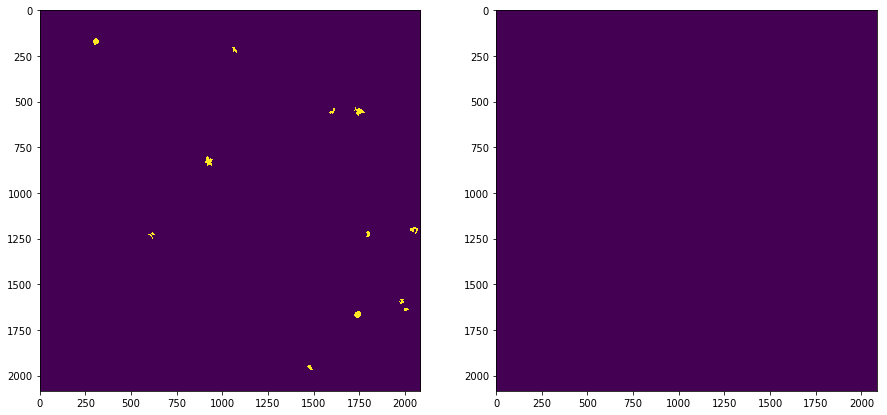

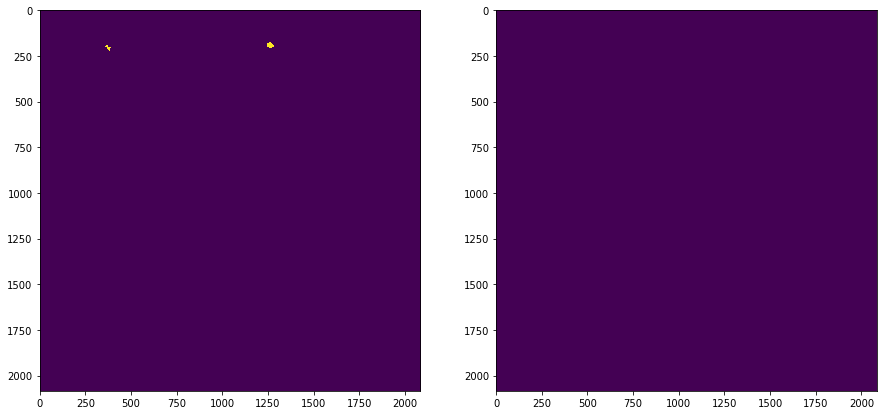

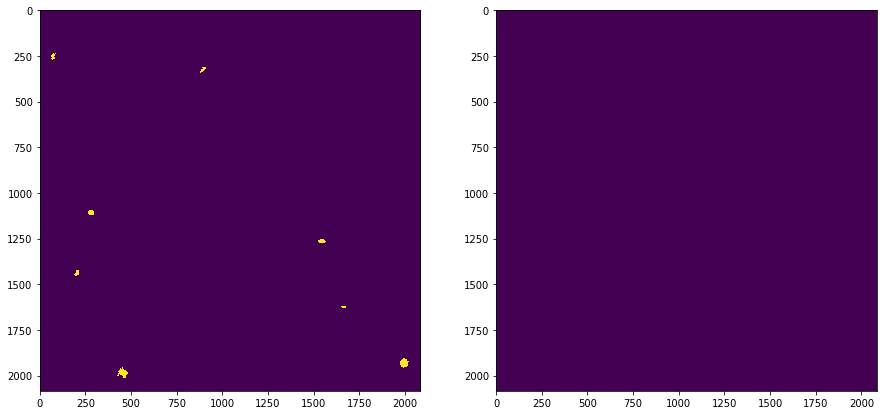

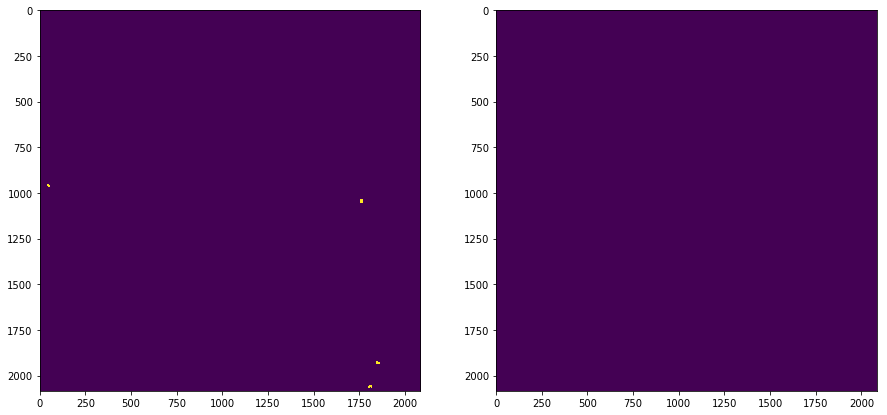

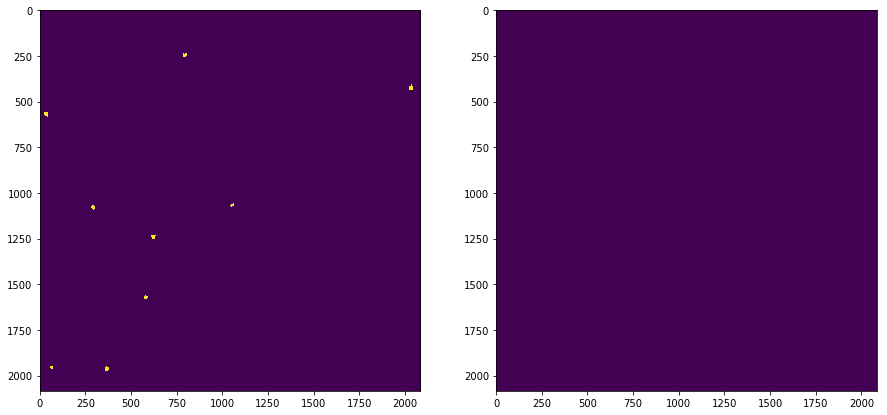

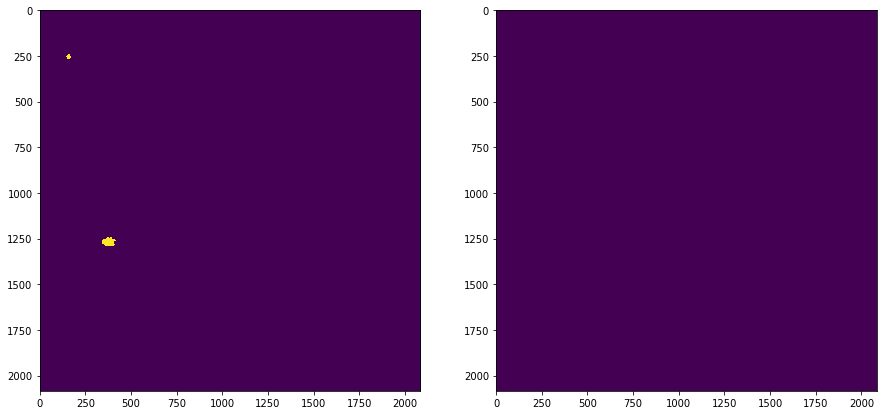

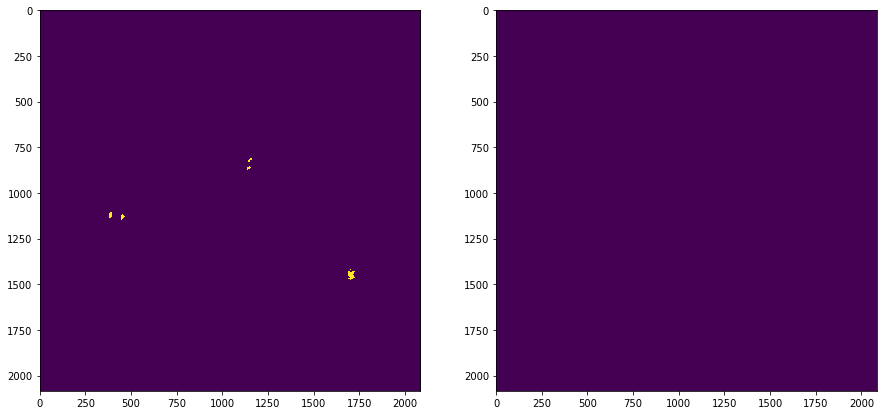

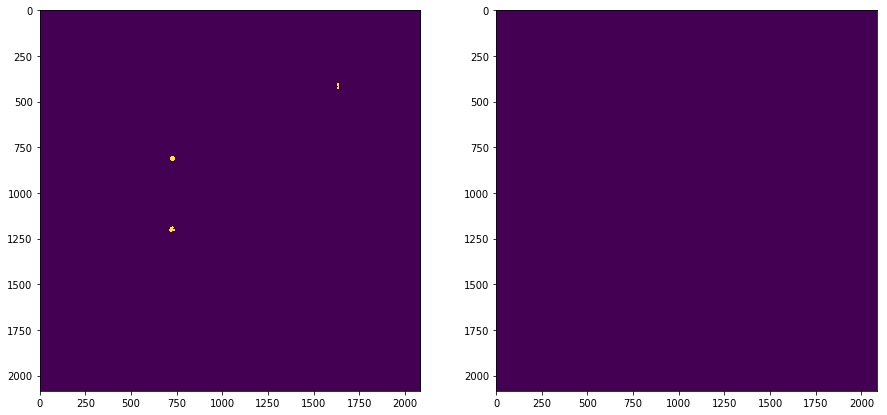

In [40]:
for i in range(Y_test.shape[0]):
    preprocess.show_ndimg(Y_test[i], Y_new[i])

In [44]:
print(Y_test.shape)
print(Y_pred.shape)
print(Y_new.shape)

(8, 2084, 2084, 1)
(8, 2084, 2084, 1)
(8, 2084, 2084, 1)


In [46]:
Y_new = Y_test

array([[[[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        ..., 
        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]]],


       [[[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         ..., 
         [ 1.],
 

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [101]:
y_test = Y_test[0,:,:,0]
y_pred = Y_pred[0,:,:,0]
y_new = np.around(y_pred[:] + 0.5)
print(np.sum(y_new))

16656.0


In [102]:
y_new

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  0., ...,  0.,  1.,  1.],
       ..., 
       [ 1.,  1.,  0., ...,  0.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)

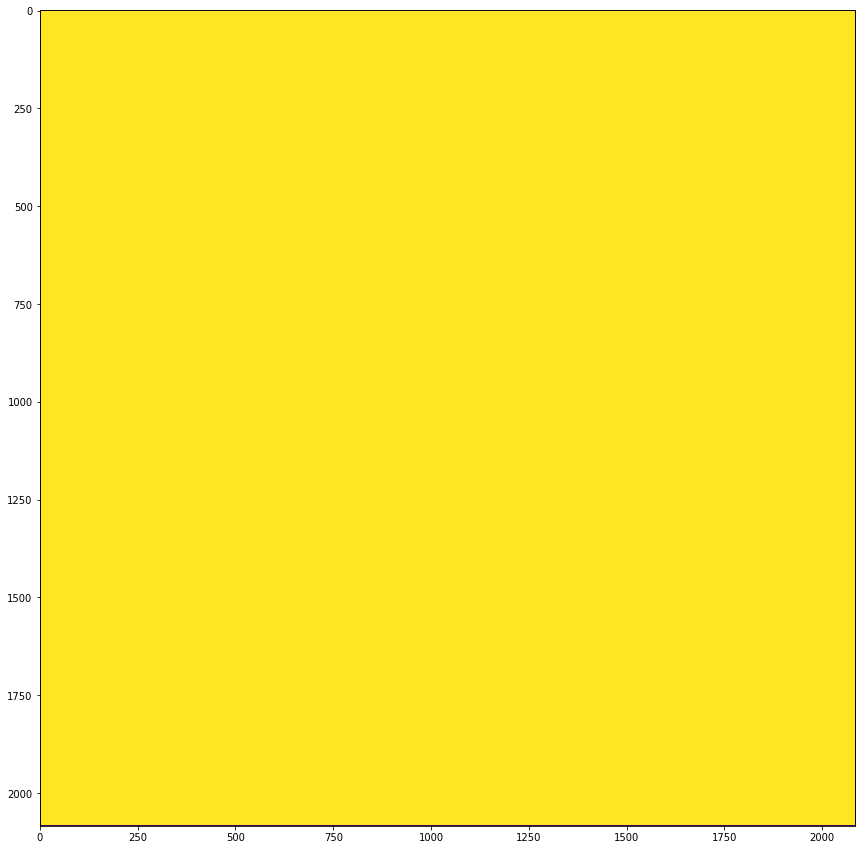

In [104]:
fig = plt.figure(figsize=(15, 15))
plt.imshow(y_new * -1 + 1)

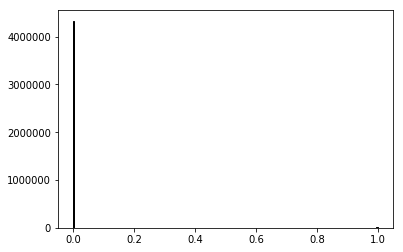

In [66]:
plt.hist(y_test.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

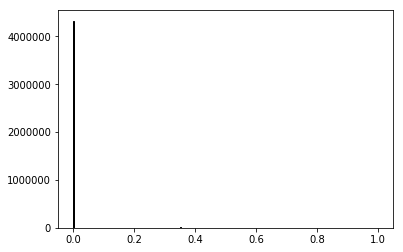

In [67]:
plt.hist(y_pred.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()